# HW3 - Logistic Regression

## (i) Linear regression implementation

In [1]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import numpy as np 

Download, read and print the data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print('Training Dataset')
print(train.head())
print('Test Dataset')
print(test.head())

Training Dataset
      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
Test Dataset
    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864


Prepare input data and label (remove NaN samples)

In [3]:
print(train.isna().sum()) # One NaN value in training set.  
print(test.isna().sum()) # No NaN value in testing set. 
train.dropna(inplace=True)

x    0
y    1
dtype: int64
x    0
y    0
dtype: int64


Implement LinearRegression class. There are four functions in this class: init
(initialization, you don’t need to work on this), fit(), update weights(), and predict(). You need to decide
what variables should be passed to each function, and finish the rest three functions.

In [4]:
class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y, learning_rate=0.2, num_iterations=1000):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(num_iterations):
            # make predictions
            y_predicted = self.predict(X)

            # calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update weights
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

    def update_weights(self, X, y, learning_rate):
        n_samples, n_features = X.shape
        y_predicted = self.predict(X)

        # calculate gradients
        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)

        # update weights
        self.weights -= learning_rate * dw
        self.bias -= learning_rate * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

Build your model and train with training set

In [35]:
# Split the dataset into training and testing sets
from sklearn.linear_model import LinearRegression
X_train = train['x'].values.reshape(-1, 1)
X_test = test['x'].values.reshape(-1, 1)
y_train = train['y']
y_test = test['y']

# Create an instance of the LinearRegression class
linear = LinearRegression()

# Train the model on the training set
linear.fit(X_train, y_train)

LinearRegression()

Make predictions with test set

In [36]:
y_pred = linear.predict(X_test)

Calculate and print the mean square error of your prediction

In [37]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

9.432922192039305

Plot your prediction and labels. (You may use matplotlib package.)

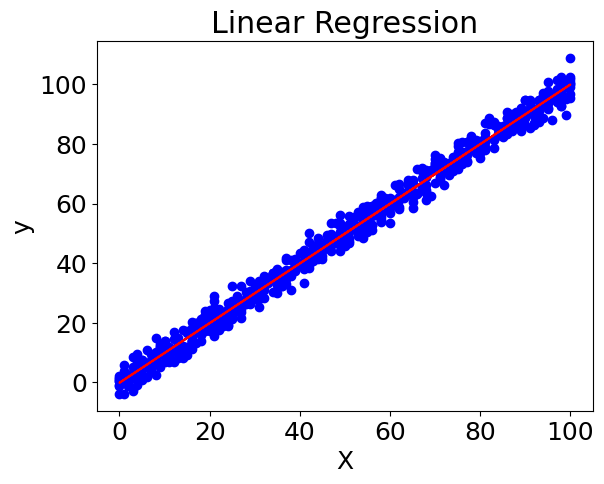

In [38]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

## (ii) Preprocessing the Data

Download, read and print the data

In [10]:
df = pd.read_csv('Hitters.csv')
print (df.head())

              Player  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0     -Andy Allanson    293    66      1    30   29     14      1     293   
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   

   CHits  ...  CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
0     66  ...     30    29      14       A        E     446       33      20   
1    835  ...    321   414     375       N        W     632       43      10   
2    457  ...    224   266     263       A        W     880       82      14   
3   1575  ...    828   838     354       N        E     200       11       3   
4    101  ...     48    46      33       N        E     805       40       4   

   Salary  NewLeague  
0     NaN          A  
1   475.0 

Print the shape of the data. Shape means the dimensions of the data.

Ans: There are 322 rows and 21 columns in the dataframe. 

In [11]:
df.shape

(322, 21)

Does the data have any missing values? How many are missing?

**Ans**: There are **59** missing values in the **salary** column. 

In [12]:
print(df.isna().sum())

Player        0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


Drop all the rows with any missing data. (In pandas, check out dropna(). dropna()
accepts an argument inplace.)

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(263, 21)

Extract the features and the label from the data. Our label is NewLeague and all the
others are considered features.

In [15]:
X = df[['AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','League','Division','PutOuts','Assists','Errors','Salary']]
y = df[['NewLeague']]

Data preprocessing. We want to do one-hot encoding for categorical features. To
do so, we first need to separate numerical columns from nonnumerical columns.

In [16]:
X_cat = X.select_dtypes(exclude=['int64', 'float64'])                                                                                                         
X_dog = X.select_dtypes(include=['int64', 'float64'])                                                                                                         
                                                                                                                                                              
X_cat = pd.get_dummies(X_cat)                                                                                                                                 
X = pd.concat([X_cat, X_dog], axis=1)   

In [17]:
X

,League_A,League_N,Division_E,Division_W,AtBat,Hits,HmRun,Runs,RBI,Walks,...,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,0,1,0,1,315,81,7,24,38,39,...,3449,835,69,321,414,375,632,43,10,475.0
2,1,0,0,1,479,130,18,66,72,76,...,1624,457,63,224,266,263,880,82,14,480.0
3,0,1,1,0,496,141,20,65,78,37,...,5628,1575,225,828,838,354,200,11,3,500.0
4,0,1,1,0,321,87,10,39,42,30,...,396,101,12,48,46,33,805,40,4,91.5
5,1,0,0,1,594,169,4,74,51,35,...,4408,1133,19,501,336,194,282,421,25,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0,1,1,0,497,127,7,65,48,37,...,2703,806,32,379,311,138,325,9,3,700.0
318,1,0,1,0,492,136,5,76,50,94,...,5511,1511,39,897,451,875,313,381,20,875.0
319,1,0,0,1,475,126,3,61,43,52,...,1700,433,7,217,93,146,37,113,7,385.0
320,1,0,1,0,573,144,9,85,60,78,...,3198,857,97,470,420,332,1314,131,12,960.0


Transform the output into numerical format. If you have selected the label as a pandas
series, you can use .replace() function. In the label, transform ’A’ to 0 and ’N’ to 1.

In [18]:
NewLeague2number_dict = {
    'A':0,
    'N':1
}

y = y.replace({"NewLeague": NewLeague2number_dict})

In [19]:
y

,NewLeague
1,1
2,0
3,1
4,1
5,0
...,...
317,1
318,0
319,0
320,0


## (iii) Models for Hitters

Prediction: Using 80% of the data as a training set and 20% as a testing set, please train a linear regression model and a logistic regression model.

In [23]:
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a linear regression model
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred_linear = linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print('Linear regression MSE:', mse_linear)

# Train a logistic regression model
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred_logistic = logistic.predict(X_test)
acc_logistic = accuracy_score(y_test, y_pred_logistic)
print('Logistic regression accuracy:', acc_logistic)

Linear regression MSE: 0.07164936626567002
Logistic regression accuracy: 0.6415094339622641


C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Please provide the coefficients for each feature for both models. Are they the same? Are they different? Why?

**Ans**: In linear regression, the coefficients represent the slope of the line that best fits the data, while in logistic regression, the coefficients represent the change in the log-odds of the target variable for a unit change in the corresponding feature, so the coefficients for the two models will be different.

In [24]:
linear_reg_coefs = linear.coef_
log_reg_coefs = logistic.coef_

print(f"Coefficients for Linear Regression model:\n{linear_reg_coefs}\n")
print(f"Coefficients for Logistic Regression model:\n{log_reg_coefs}")

Coefficients for Linear Regression model:
[[-4.31116520e-01  4.31116520e-01 -1.36886978e-02  1.36886978e-02
   6.05168251e-04 -1.24388752e-03 -1.62483463e-03 -6.97290499e-04
  -4.67570745e-04  1.72875437e-03 -1.28078634e-03 -1.05089724e-05
   3.48931710e-04  2.44242493e-04 -2.37321444e-04 -2.90052147e-04
  -1.78688180e-04  2.00718538e-05 -7.80038713e-05 -3.18816107e-03
  -1.38474042e-05]]

Coefficients for Logistic Regression model:
[[-1.18659613e-02  1.17359417e-02 -6.18338547e-05 -6.81857633e-05
   4.00526560e-03 -1.15811515e-02 -1.13562829e-02 -2.03572076e-02
  -8.13601922e-03  2.14970276e-02 -3.67601738e-03 -4.94823764e-04
   5.77198131e-03  5.39818283e-04 -7.11294902e-03 -1.13517292e-03
  -2.49039714e-04  6.39699459e-04 -6.26290221e-04  6.29349386e-03
   4.77321583e-04]]


Please plot the ROC curve for both models. What are the area under the curve measurements?

**Ans**: AUC for logistic regression and linear regression is 0.58 and 0.92 respectively. 

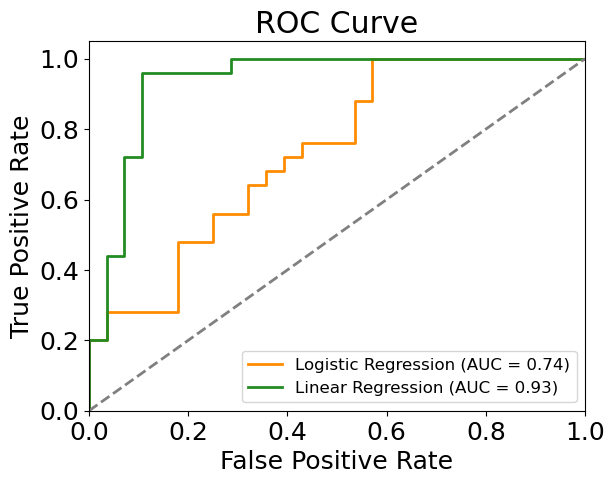

In [25]:
from sklearn.metrics import roc_curve, auc

# Compute the predicted probabilities for the test set for logistic regression 
y_pred_log = logistic.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for both models
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_log)
fpr_lnr, tpr_lnr, thresholds_lnr = roc_curve(y_test, y_pred_linear)

# Calculate area under the curve for both models 
roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_lnr = auc(fpr_lnr, tpr_lnr)

# Plot the ROC curve for the logistic regression model
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log)

# Plot the ROC curve for the linear regression model
plt.plot(fpr_lnr, tpr_lnr, color='forestgreen', lw=2, label='Linear Regression (AUC = %0.2f)' % roc_auc_lnr)

# Plot the diagonal (random guess)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Set the plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right", fontsize=12)

# Show the plot
plt.show()

What is the optimal decision threshold to maximize the f1 score?

**Ans**: The optimal decision threshold to maximize the f1 score for **Logistic Regression** is **0**. However, since the F1 score is a metric used to evaluate the performance of binary classification models and linear regression is not a binary classification model, there is no threshold or binary decision to be made, and the F1 score is not applicable to this type of model.

In [26]:
from sklearn.metrics import f1_score

# Predict probabilities for the test set
y_pred_log = logistic.predict_proba(X_test)[:, 1]

# Create a list of threshold values to try
thresholds = np.arange(0, 1.01, 0.01)

# Initialize variables to keep track of the optimal threshold and F1 score
optimal_threshold = 0
max_f1_score = 0

# Loop over each threshold value and calculate the F1 score
for threshold in thresholds:
    y_pred = (y_pred_logistic >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    
    # Update optimal threshold and max F1 score if a better F1 score is found
    if f1 > max_f1_score:
        optimal_threshold = threshold
        max_f1_score = f1

print(f"Optimal decision threshold: {optimal_threshold:.2f}")
print(f"Max F1 score: {max_f1_score:.3f}")

Optimal decision threshold: 0.00
Max F1 score: 0.641


Five-fold Cross-validation: Repeat (1) using a stratified, five-fold cross-validation.

In [27]:
num_of_folds = 5

auc_dict = {'log_reg': 0,  'lnr_reg': 0}

skf = StratifiedKFold(n_splits = num_of_folds, shuffle = True)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()

    log_regressor = LogisticRegression() 
    log_regressor.fit(X_train, y_train)
    y_pred_log = log_regressor.predict(X_test)
    
    lnr_regressor = LinearRegression()
    lnr_regressor.fit(X_train, y_train)
    y_pred_lnr = lnr_regressor.predict(X_test)
    
    auc_dict['log_reg'] += roc_auc_score(y_test, y_pred_log)/num_of_folds
    auc_dict['lnr_reg'] += roc_auc_score(y_test, y_pred_lnr)/num_of_folds
    print(auc_dict)

{'log_reg': 0.123, 'lnr_reg': 0.19257142857142856}
{'log_reg': 0.24857142857142858, 'lnr_reg': 0.36257142857142854}
{'log_reg': 0.34339901477832513, 'lnr_reg': 0.5298128078817734}
{'log_reg': 0.4499466338259442, 'lnr_reg': 0.7277294745484402}
{'log_reg': 0.5761371100164204, 'lnr_reg': 0.9155270935960592}


C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Do the features change in each fold?

**Ans**: In k-fold cross-validation, the data is split into k equal-sized folds. Each fold is used once as a validation set while the k-1 remaining folds are used for training the model. Therefore, in each fold, the training set and validation set are different, but the entire dataset and its features remain the same throughout the cross-validation process.

Please provide a mean and 95% confidence interval for the AUROCs for each model.

In [28]:
# Calculate the AUROCs using 5-fold cross-validation
aurocs_log = cross_val_score(log_regressor, X, y, cv=skf, scoring='roc_auc')
aurocs_lnr = cross_val_score(lnr_regressor, X, y, cv=skf, scoring='roc_auc')
    
# Calculate the mean and 95% confidence interval for the AUROCs for logistic regression
mean_auroc_log = np.mean(aurocs_log)
lower_ci_log = np.percentile(aurocs_log, 2.5)
upper_ci_log = np.percentile(aurocs_log, 97.5)

# Calculate the mean and 95% confidence interval for the AUROCs for linear regression
mean_auroc_lnr = np.mean(aurocs_lnr)
lower_ci_lnr = np.percentile(aurocs_lnr, 2.5)
upper_ci_lnr = np.percentile(aurocs_lnr, 97.5)


print(f'Mean AUROC for Logistic Regressoin: {mean_auroc_log:.3f}')
print(f'95% CI for Logistic Regressoin: [{lower_ci_log:.3f}, {upper_ci_log:.3f}]\n')

print(f'Mean AUROC for Linear Regressoin: {mean_auroc_lnr:.3f}')
print(f'95% CI for Linear Regressoin: [{lower_ci_lnr:.3f}, {upper_ci_lnr:.3f}]\n')

Mean AUROC for Logistic Regressoin: 0.589
95% CI for Logistic Regressoin: [0.523, 0.720]

Mean AUROC for Linear Regressoin: 0.930
95% CI for Linear Regressoin: [0.911, 0.950]



C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Please provide a mean and 95% confidence interval for the f1 score for each model.

**Ans**: Mean f1 score for Logistic Regression: 0.548.
         95% confidence interval for Logistic Regression: [0.482, 0.613]

**NOTE**: F1 score is a classification metric and the linear regression model is a regression model, thus it is not appropriate for the linear regression model.

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Define the cross-validation function to calculate the f1 score
f1_scorer = make_scorer(f1_score, pos_label=1)
f1_scores = cross_val_score(log_regressor, X, y, cv=5, scoring=f1_scorer)

f1_scorer_lnr = make_scorer(f1_score, pos_label=1)
f1_scores_lnr = cross_val_score(lnr_regressor, X, y, cv=5, scoring=f1_scorer_lnr)

# Calculate the mean and confidence interval of the f1 scores for logistic regression 
f1_mean = f1_scores.mean()
f1_std = f1_scores.std()
f1_ci = 1.96 * f1_std / np.sqrt(len(f1_scores))

# Calculate the mean and confidence interval of the f1 scores for linear regression 
f1_mean_lnr = f1_scores_lnr.mean()
f1_std_lnr = f1_scores_lnr.std()
f1_ci_lnr = 1.96 * f1_std_lnr / np.sqrt(len(f1_scores_lnr))

print("Mean f1 score for Logistic Regression: {:.3f}".format(f1_mean))
print("95% confidence interval for Logistic Regression: [{:.3f}, {:.3f}]\n".format(f1_mean - f1_ci, f1_mean + f1_ci))

print("Mean f1 score for Linear Regression: {:.3f}".format(f1_mean_lnr))
print("95% confidence interval for Linear Regression: [{:.3f}, {:.3f}]".format(f1_mean_lnr - f1_ci_lnr, f1_mean_lnr + f1_ci_lnr))

Mean f1 score for Logistic Regression: 0.548
95% confidence interval for Logistic Regression: [0.482, 0.613]

Mean f1 score for Linear Regression: nan
95% confidence interval for Linear Regression: [nan, nan]


C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

## (iv) Additional Model Tests for Hitters

Using 80% of the data as a training set and 20% as a testing set, please implement a ridge regression and a lasso regularization logistic regression model for Hitters dataset. Please describe your hyperparameter tuning procedures.

**Ans**: 1) Split the data into training and testing sets, with 80% of the data used for training and 20% for testing. 2) Implement the Ridge and Lasso models and set up a grid of hyperparameters to search over. 3) Use cross-validation to estimate the performance of the models with different hyperparameters. 4) Select the hyperparameters that give the best performance. 5) Train the final model using the selected hyperparameters on the training set and evaluate its performance on the testing set.

In [30]:
num_of_folds = 5

auc_dict               = {'ridge_reg': 0,  'lasso_reg': 0}
chosen_hyperparam_dict = {'ridge_reg': [], 'lasso_reg': []}

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
    
    ridge_regressor = Ridge()
    ridge_regressor = GridSearchCV(estimator=ridge_regressor, param_grid={'alpha':[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}, cv= 5)
    ridge_regressor.fit(X_train, y_train)
    chosen_hyperparam_dict['ridge_reg'].append(ridge_regressor.best_params_['alpha'])
    
    lasso_regressor = Lasso()
    lasso_regressor = GridSearchCV(estimator=lasso_regressor, param_grid={'alpha':[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]}, cv= 5)
    lasso_regressor.fit(X_train, y_train)
    chosen_hyperparam_dict['lasso_reg'].append(lasso_regressor.best_params_['alpha'])
    
    ridge_pred = ridge_regressor.predict(X_test)
    lasso_pred = lasso_regressor.predict(X_test)
    
    auc_dict['ridge_reg'] += roc_auc_score(y_test, ridge_pred)/num_of_folds
    auc_dict['lasso_reg'] += roc_auc_score(y_test, lasso_pred)/num_of_folds
    print(auc_dict)

C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.774e+00, tolerance: 4.162e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.002e+00, tolerance: 4.198e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

{'ridge_reg': 0.188, 'lasso_reg': 0.18828571428571428}


C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.870e+00, tolerance: 4.171e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.870e+00, tolerance: 4.198e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

{'ridge_reg': 0.382, 'lasso_reg': 0.3842857142857143}


C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.533e+00, tolerance: 4.162e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.932e+00, tolerance: 4.198e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

{'ridge_reg': 0.5627471264367816, 'lasso_reg': 0.5656075533661741}


C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.864e+00, tolerance: 4.224e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.570e+00, tolerance: 4.147e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

{'ridge_reg': 0.7389376026272578, 'lasso_reg': 0.7415004105090313}


C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.176e+00, tolerance: 4.152e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.084e+00, tolerance: 4.224e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

{'ridge_reg': 0.9201876026272579, 'lasso_reg': 0.9260242200328408}


C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.818e+00, tolerance: 5.248e-03
  model = cd_fast.enet_coordinate_descent(


Please provide the coefficients for each feature for both models. Are they the same? Are they different? Why?

**Ans**: 4 of the coefficients obtained by LASSO are exactly zero since LASSO regression imposes an L1 penalty, which shrinks some coefficients to zero and can be useful for feature selection and simplify the model. On the other hand, Ridge regression imposes an L2 penalty, which shrinks the coefficients towards zero, but none are completely eliminated. This can be useful for reducing the impact of multicollinearity in the data.

In [31]:
# Select the most frequent chosen value for alpha 
def most_frequent(List): 
    return max(set(List), key = List.count)

In [32]:
ridge_regressor = Ridge(alpha = most_frequent(chosen_hyperparam_dict['ridge_reg']))
ridge_regressor.fit(X, y.values.ravel())
    
lasso_regressor = Lasso(alpha = most_frequent(chosen_hyperparam_dict['lasso_reg']))
lasso_regressor.fit(X, y.values.ravel())

print(f"Coefficients for Ridge Regression model:\n{ridge_regressor.coef_}\n")
print(f"Coefficients for Lasso Regression model:\n{lasso_regressor.coef_}")

Coefficients for Ridge Regression model:
[-4.27144896e-01  4.27144896e-01  5.66429725e-03 -5.66429725e-03
  7.48326276e-04 -2.03450519e-03 -3.44430988e-03  1.04608127e-04
  4.12240783e-04  9.42646573e-04 -2.62761341e-03 -9.51544421e-05
  9.72186908e-04  1.33293176e-03 -9.14970965e-04 -6.42102480e-04
  5.44283683e-05  3.89909909e-06 -3.15349134e-05 -3.89552142e-03
 -1.63194803e-05]

Coefficients for Lasso Regression model:
[-8.10560949e-01  7.67207138e-14  0.00000000e+00 -0.00000000e+00
  6.92603538e-04 -1.68910115e-03 -2.59844063e-03 -2.89040391e-04
  0.00000000e+00  1.14365047e-03 -4.87555898e-04 -8.77920245e-05
  8.68828487e-04  9.92080881e-04 -8.30143787e-04 -5.14102667e-04
  3.13483241e-05  8.11882908e-06 -5.36129371e-05 -2.75989814e-03
 -8.04022995e-06]


C:\Users\MEI-KUEI LU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.321e+00, tolerance: 6.541e-03
  model = cd_fast.enet_coordinate_descent(


Please plot the ROC curve for both models. What are the area under the curve measurements?

**Ans**: AUC for both ridge and lasso models are 0.918. 

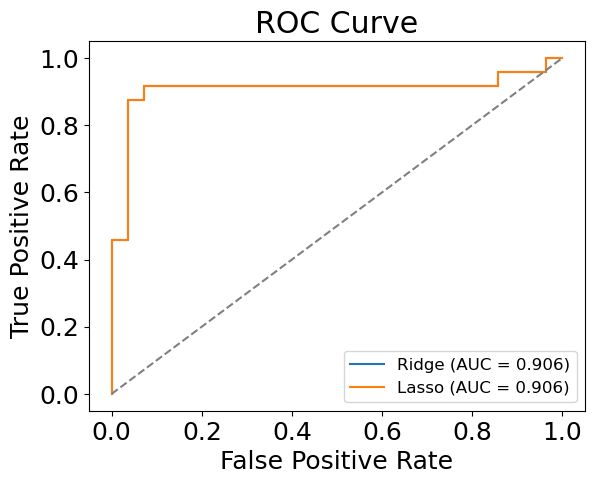

In [33]:
# Compute fpr, tpr, and thresholds for both models
fpr_ridge, tpr_ridge, thresholds_ridge = roc_curve(y_test, ridge_pred)
fpr_lasso, tpr_lasso, thresholds_lasso = roc_curve(y_test, ridge_pred)

# Compute AUC for both models
auc_ridge = auc(fpr_ridge, tpr_ridge)
auc_lasso = auc(fpr_lasso, tpr_lasso)

# Plot ROC curves
plt.plot(fpr_ridge, tpr_ridge, label=f"Ridge (AUC = {auc_ridge:.3f})")
plt.plot(fpr_lasso, tpr_lasso, label=f"Lasso (AUC = {auc_lasso:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(fontsize=12)
plt.show()

How do these compare to the models from Problem 3? Please describe similarities and differences.

**Ans**: The ROC curves and AUC values for the Ridge and LASSO logistic regression models are similar to that of the linear regression model (AUC > 0.9) with the AUC of logistic regression being 0.7. However, there are some differences in the coefficients of the features for each model.

In the case of Ridge regression, the coefficients are shrunk towards zero, but they are not zeroed out completely. This means that all features still have some impact on the model's output, even if it's small.

In the case of LASSO regression, the coefficients are forced to zero, meaning that some features may be completely excluded from the model. This can be a useful feature selection technique, as it allows for the identification of the most important features for the model's performance.

Overall, Ridge, LASSO and linear regression model indicate excellent discrimination between classes while logistic model might not be suitable for the prediction of the features in this dataset. 
